# Fantasy Premier League

## Chip Strategy

Chips are bonuses to use once per gameweek. The **Wildcard** allows you to make unlimited transfer for a week. The **Freehit** allows to make unlimited transfers (temporary for a single GW). The **Bench Boost** gives you the points scored by yout benched players. The **Triple Captain** triples the points of yout captain instead of double.

In this notebook, we will study the chip strategy of top managers from the 2020-2021 FPL Season.

In [1]:
import pandas as pd
import numpy as np
# Get fixtures
fixtures = pd.read_csv("../data/fpl_official/vaastav/data/2020-21/fixtures.csv")[['event', 'team_a', 'team_h']]

gw_type = {}
for gw in range(1, 39):
    if fixtures[fixtures['event'] == gw].shape[0] < 10:
        gw_type[gw] = 'BGW'
    elif fixtures[fixtures['event'] == gw].shape[0] > 10:
        gw_type[gw] = 'DGW'
    else :
        # Handle dgw for some & bgw for others
        playing_teams = list(fixtures[fixtures['event'] == 1]['team_a'].values) + list(fixtures[fixtures['event'] == 1]['team_h'].values)
        if np.all([team_id in playing_teams for team_id in np.arange(1, 20)]):
            gw_type[gw] = 'Mixed'
        else:
            gw_type[gw] = 'Vanilla'

## Chip usage

In [2]:
import glob
import os

path = '../data/fpl_official/20-21/season/raw/'
all_managers = glob.glob(os.path.join(path, "managers_[0-9][0-9][0-9][0-9][0-9].json")) + \
    glob.glob(os.path.join(path, "managers_[0-9][0-9][0-9][0-9].json"))

In [3]:
chips = (
    pd.DataFrame(
        list(pd.read_json(f, orient='index')['chips']),
        columns=['wildcard_1', 'freehit', 'bboost', 'wildcard_2', 'threexc'],
        index=pd.read_json(f, orient='index').index
        )
    for f in all_managers
    )

chips = pd.concat(chips)

In [4]:
# Change index type & Sort index
chips.drop('[]', inplace=True, errors='ignore')
chips.index = chips.index.map(int)
chips.sort_index(inplace=True)

In [5]:
chips = chips.fillna(0)
chips = chips.astype(int)
# Handle the cases when managers have only used their second Wildcard.
chips.loc[(chips['wildcard_2'] == 0) & (chips['wildcard_1'] > 16), 'wildcard_2'] = chips[chips['wildcard_2'] == 0]['wildcard_1']
chips.loc[(chips['wildcard_1'] == chips['wildcard_2']) & (chips['wildcard_1'] > 16), 'wildcard_1'] = 0

### Distribution

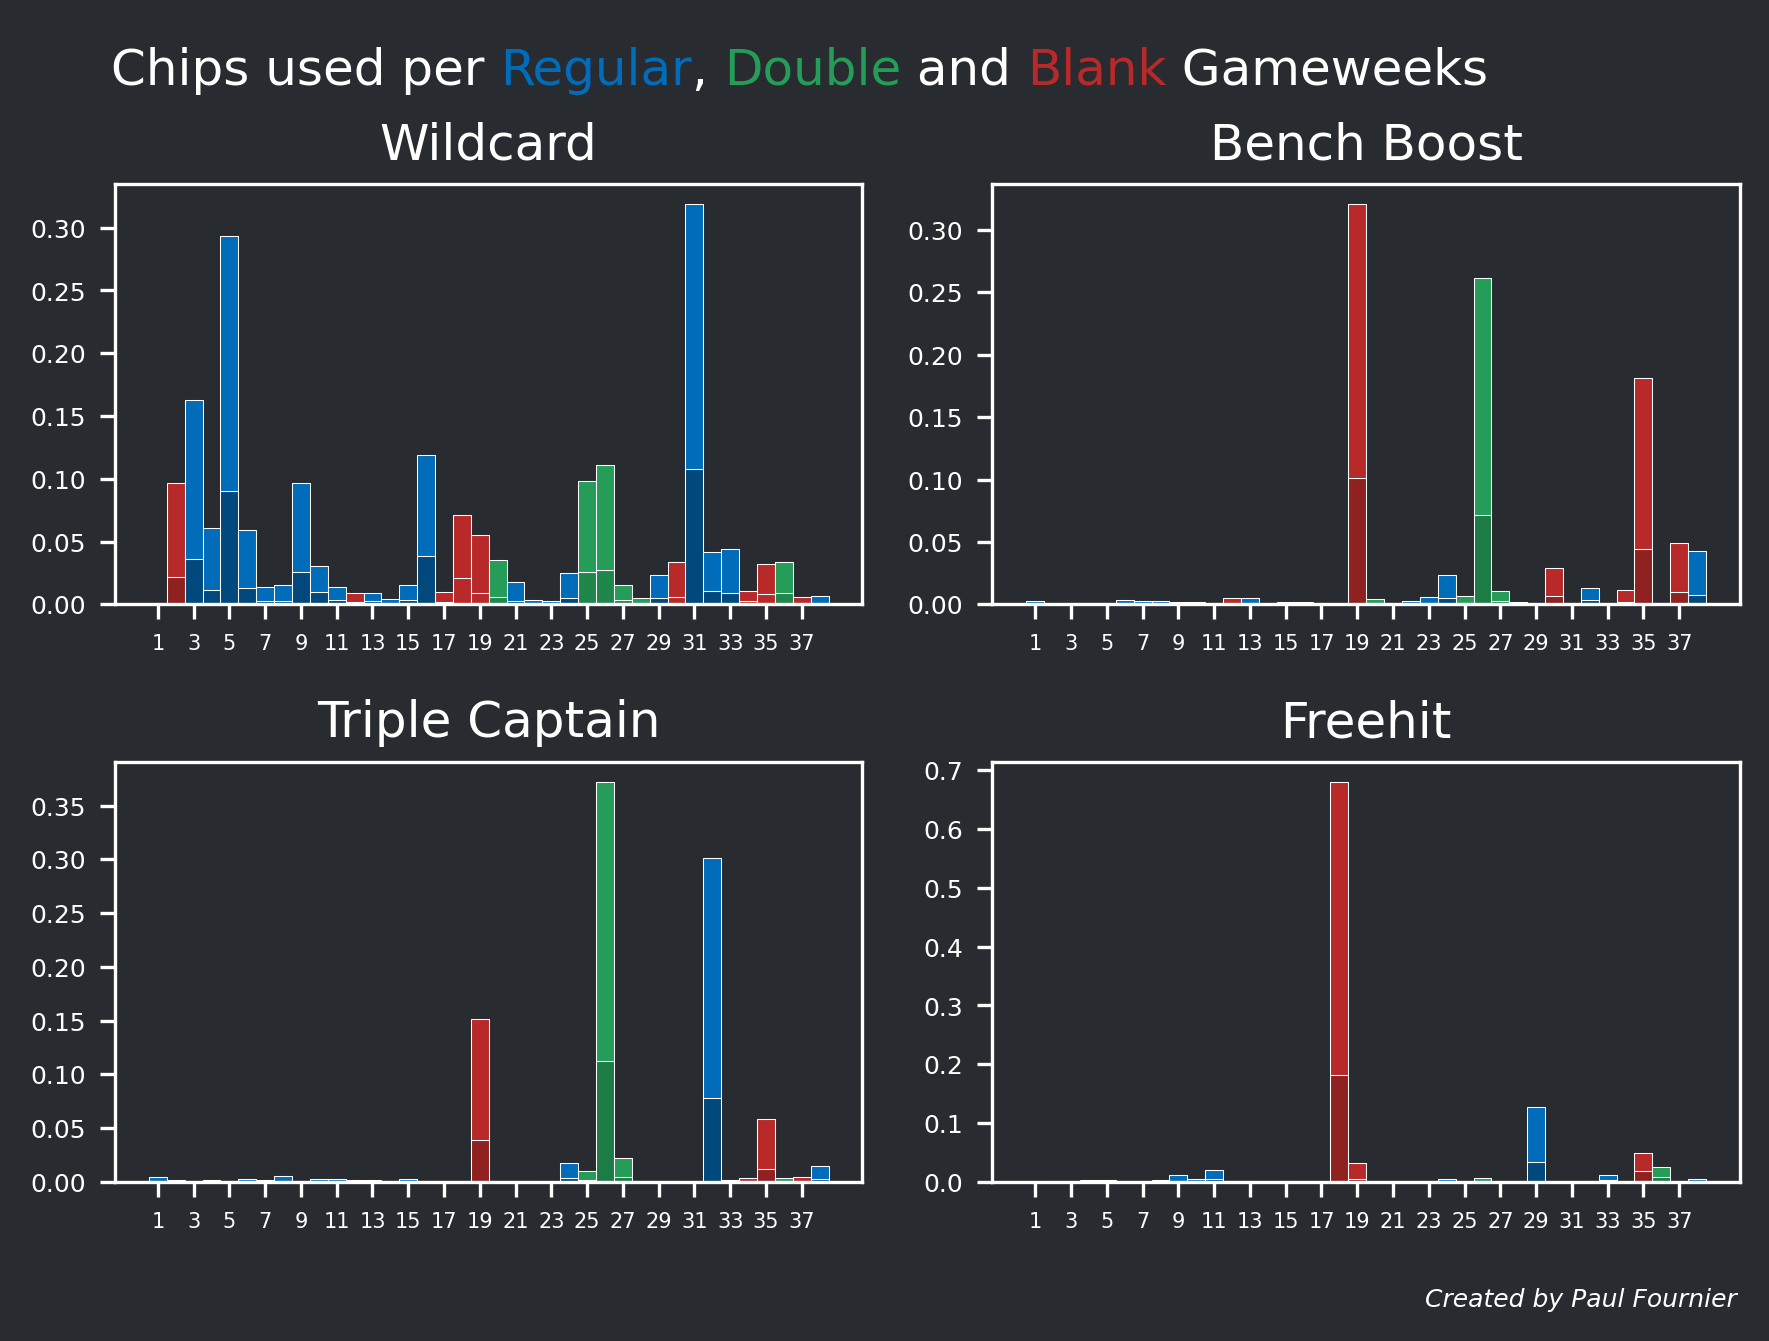

In [12]:
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300
from highlight_text import fig_text

body_font = "Open Sans"
watermark_font = "DejaVu Sans"
text_color = "w"
background = "#282B2F"
title_font = "DejaVu Sans"

mpl.rcParams['xtick.color'] = text_color
mpl.rcParams['ytick.color'] = text_color
mpl.rcParams['text.color'] = text_color
mpl.rcParams['axes.edgecolor'] = text_color
mpl.rcParams['xtick.labelsize'] = 5
mpl.rcParams['ytick.labelsize'] = 6

fig, axs = plt.subplots(2, 2, tight_layout=True)
fig.set_facecolor(background)
axs[0, 0].patch.set_alpha(0)
axs[0, 1].patch.set_alpha(0)
axs[1, 0].patch.set_alpha(0)
axs[1, 1].patch.set_alpha(0)

_, _, patches = axs[0, 0].hist(
    [chips['wildcard_2'].loc[:25000], chips['wildcard_2'].loc[25000:]], bins=np.arange(1, 40) - 0.5,
    label='2', stacked=True, density=True, color=['#01497c', '#016DBA'], edgecolor='w', linewidth=0.25, alpha=1)

for k, v in gw_type.items():
    if v == 'BGW':
        patches[0][k].set_color('#B82A2A')
        patches[0][k].set_edgecolor('w')
        patches[1][k].set_color('#B82A2A')
        patches[1][k].set_edgecolor('w')
    elif v == 'DGW':
        patches[0][k].set_color('#20874C')
        patches[0][k].set_edgecolor('w')
        patches[1][k].set_color('#259C58')
        patches[1][k].set_edgecolor('w')

_, _, patches = axs[0, 0].hist(
    [chips['wildcard_1'].loc[:25000], chips['wildcard_1'].loc[25000:]], bins=np.arange(1, 40) - 0.5,
    label='1', stacked=True, density=True, color=['#01497c', '#016DBA'], edgecolor='w', linewidth=0.25, alpha=1)
axs[0, 0].title.set_text('Wildcard')
axs[0, 0].set_xticks(np.arange(1, 39, 2), minor=False)

for k, v in gw_type.items():
    if v == 'BGW':
        patches[0][k].set_color('#902121')
        patches[0][k].set_edgecolor('w')
        patches[1][k].set_color('#B82A2A')
        patches[1][k].set_edgecolor('w')
    elif v == 'DGW':
        patches[0][k].set_color('#1D7B46')
        patches[0][k].set_edgecolor('w')
        patches[1][k].set_color('#259C58')
        patches[1][k].set_edgecolor('w')

_, _, patches = axs[0, 1].hist(
    [chips['bboost'].loc[:25000], chips['bboost'].loc[25000:]], bins=np.arange(1, 40) - 0.5,
    stacked=True, density=True, color=['#01497c', '#016DBA'], edgecolor='w', linewidth=0.25, alpha=1)
axs[0, 1].title.set_text('Bench Boost')
axs[0, 1].set_xticks(np.arange(1, 39, 2), minor=False)

for k, v in gw_type.items():
    if v == 'BGW':
        patches[0][k].set_color('#902121')
        patches[0][k].set_edgecolor('w')
        patches[1][k].set_color('#B82A2A')
        patches[1][k].set_edgecolor('w')
    elif v == 'DGW':
        patches[0][k].set_color('#1D7B46')
        patches[0][k].set_edgecolor('w')
        patches[1][k].set_color('#259C58')
        patches[1][k].set_edgecolor('w')

_, _, patches = axs[1, 0].hist(
    [chips['threexc'].loc[:25000], chips['threexc'].loc[25000:]], bins=np.arange(1, 40) - 0.5,
    stacked=True, density=True, color=['#01497c', '#016DBA'], edgecolor='w', linewidth=0.25, alpha=1)
axs[1, 0].title.set_text('Triple Captain')
axs[1, 0].set_xticks(np.arange(1, 39, 2), minor=False)

for k, v in gw_type.items():
    if v == 'BGW':
        patches[0][k].set_color('#902121')
        patches[0][k].set_edgecolor('w')
        patches[1][k].set_color('#B82A2A')
        patches[1][k].set_edgecolor('w') 
    elif v == 'DGW':
        patches[0][k].set_color('#1D7B46')
        patches[0][k].set_edgecolor('w')
        patches[1][k].set_color('#259C58')
        patches[1][k].set_edgecolor('w') 

_, _, patches = axs[1, 1].hist(
    [chips['freehit'].loc[:25000], chips['freehit'].loc[25000:]], bins=np.arange(1, 40) - 0.5,
    stacked=True, density=True, color=['#01497c', '#016DBA'], edgecolor='w', linewidth=0.25, alpha=1)
axs[1, 1].title.set_text('Freehit')
axs[1, 1].set_xticks(np.arange(1, 39, 2), minor=False)

for k, v in gw_type.items():
    if v == 'BGW':
        patches[0][k].set_color('#902121')
        patches[0][k].set_edgecolor('w')
        patches[1][k].set_color('#B82A2A')
        patches[1][k].set_edgecolor('w')
    elif v == 'DGW':
        patches[0][k].set_color('#1D7B46')
        patches[0][k].set_edgecolor('w')
        patches[1][k].set_color('#259C58')
        patches[1][k].set_edgecolor('w')

fig_text(x=0.07, y=1.025,
        s="Chips used per <Regular>, <Double> and <Blank> Gameweeks",
        highlight_textprops=[
            {"color": '#016DBA'},
            {"color": '#259C58'},
            {"color": '#B82A2A'},
            ],
        fontweight="regular", fontsize=12, fontfamily=title_font, color=text_color, alpha=1)

fig.text(0.8, -0.025, "Created by Paul Fournier", fontstyle="italic", fontsize=6, fontfamily=watermark_font, color=text_color)

plt.tight_layout()
plt.show()

### Combinations

Now we can study if (and how) managers combine the benefits of the Chips.

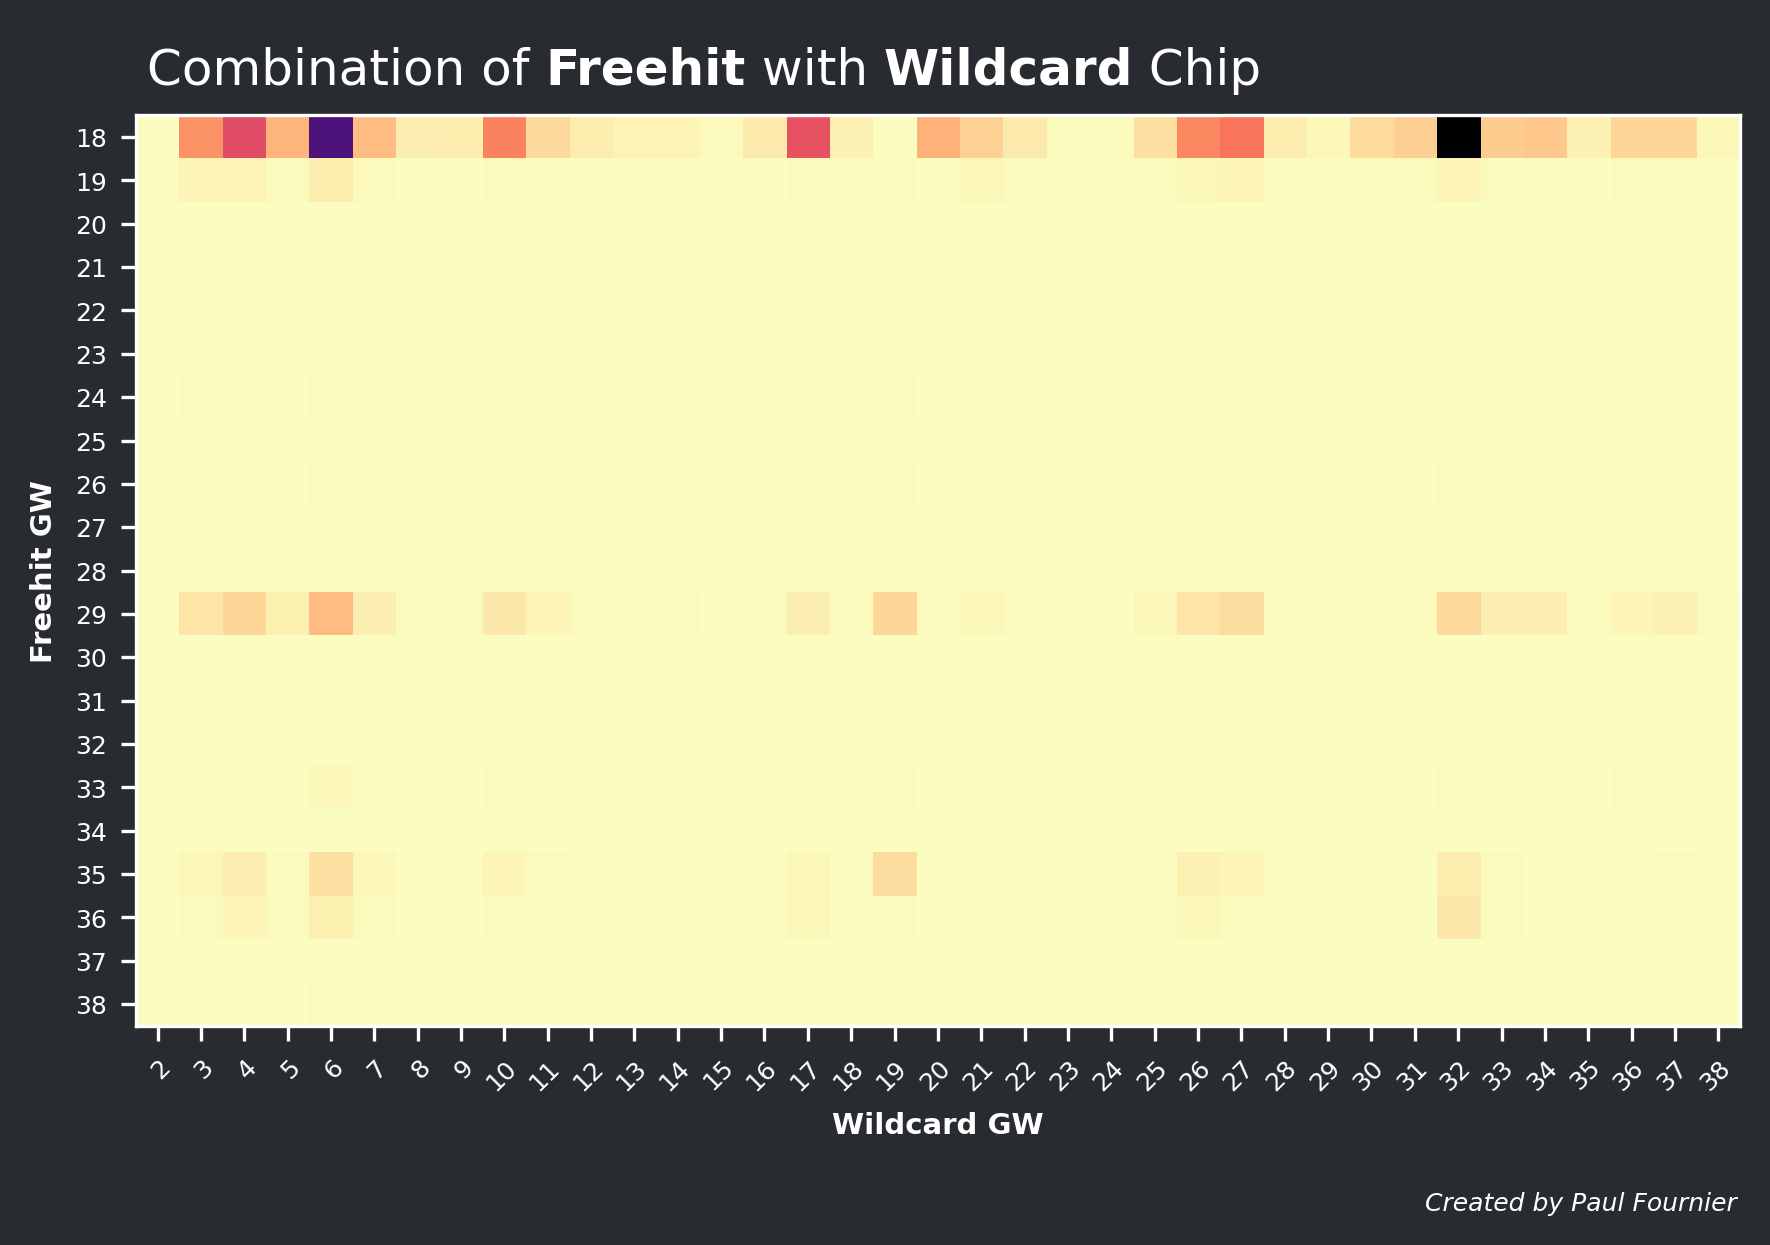

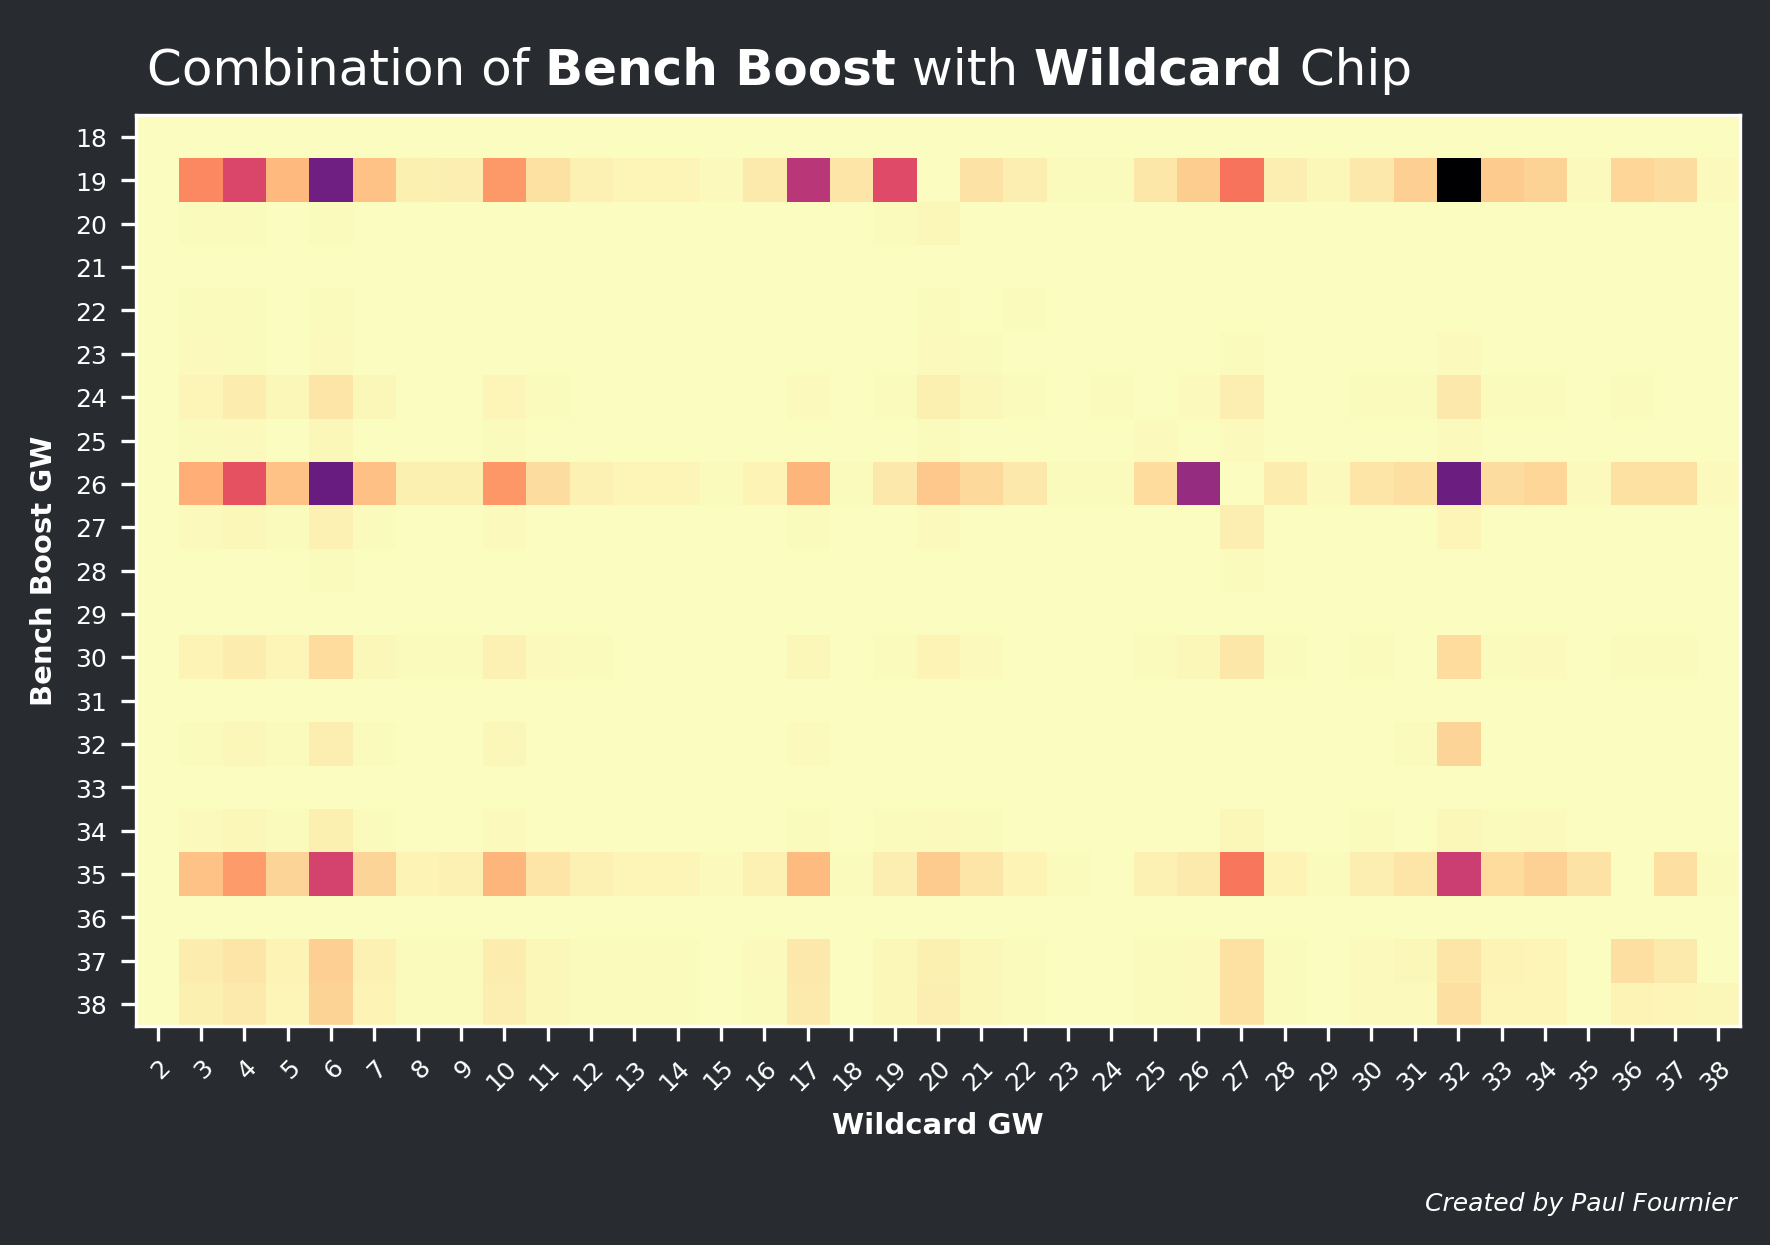

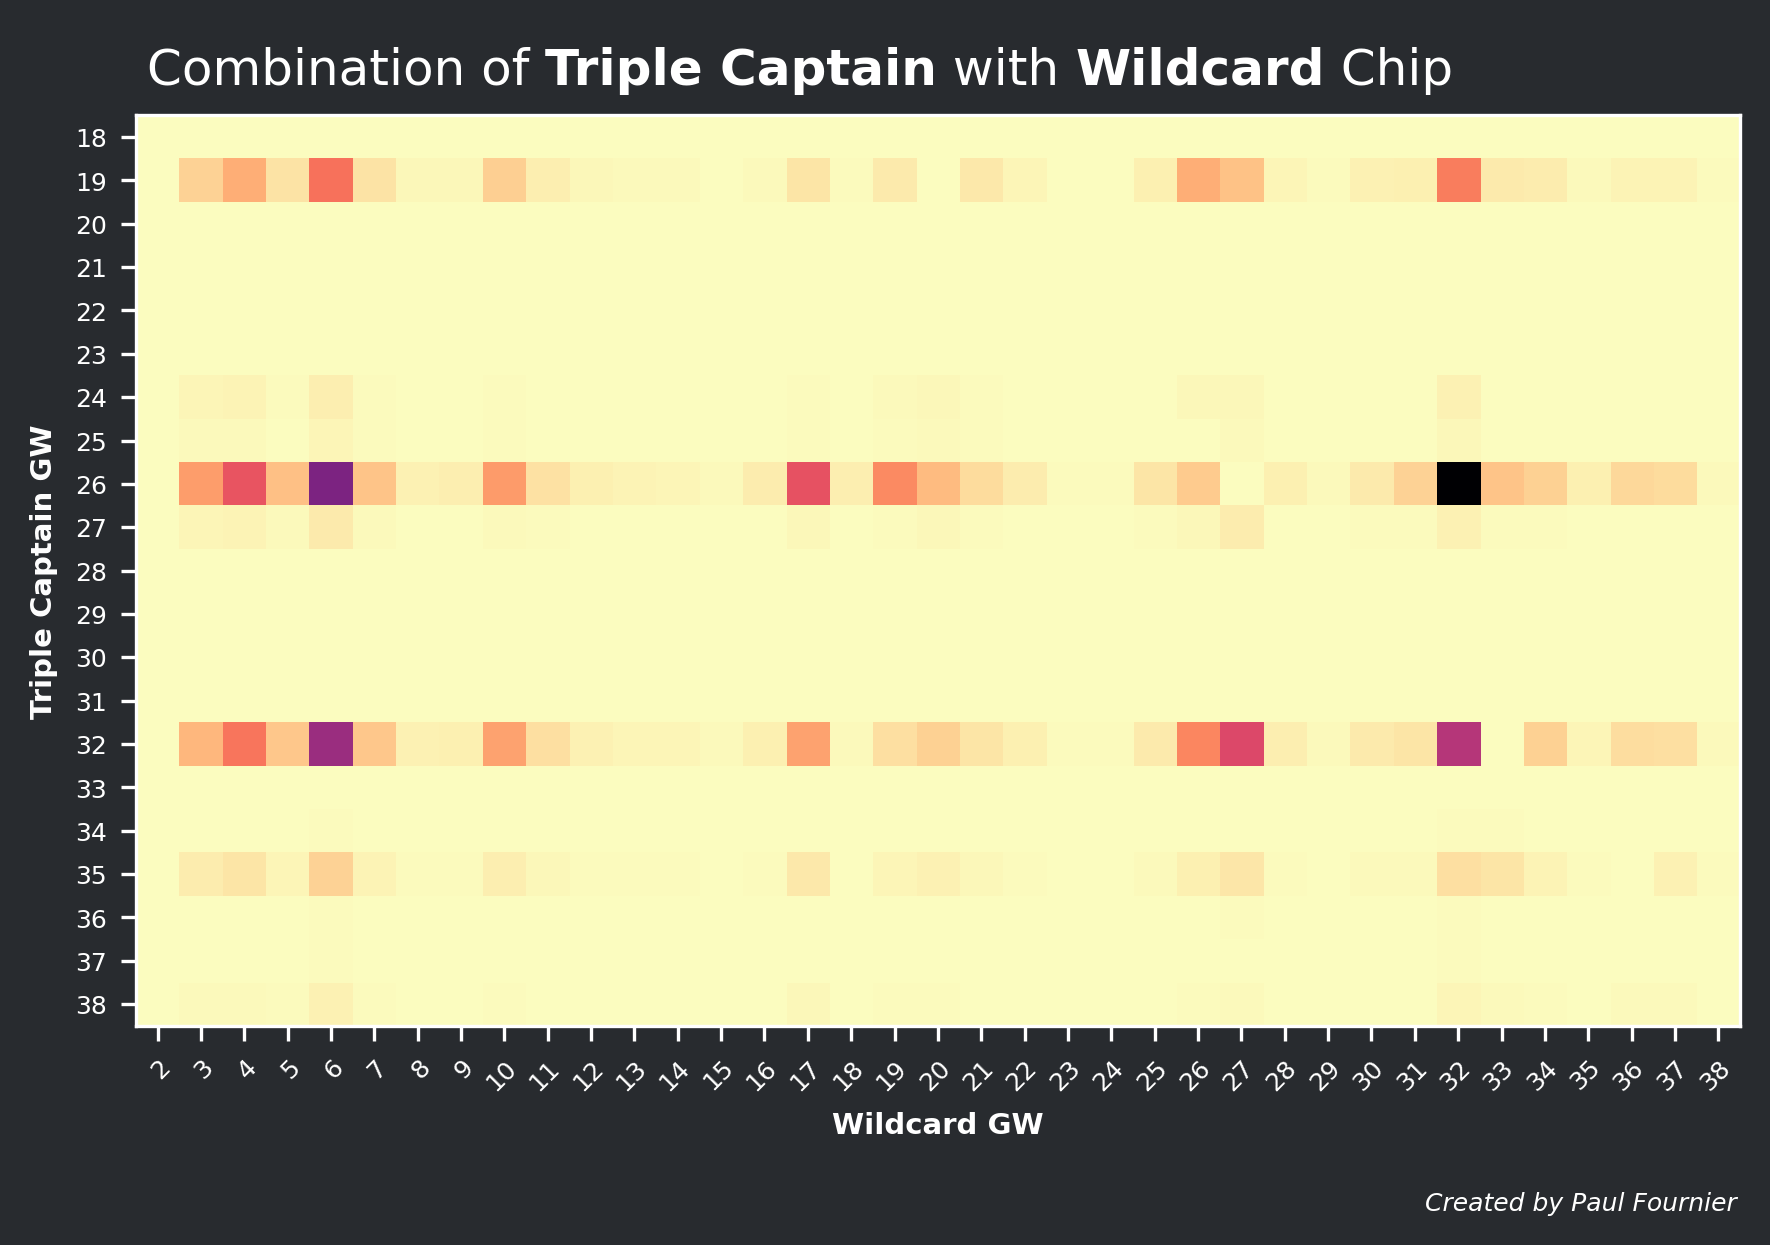

In [42]:
mpl.rcParams['xtick.labelsize'] = 6
mpl.rcParams['ytick.labelsize'] = 6

columns = ['freehit', 'bboost', 'threexc']
titles = ['Freehit', 'Bench Boost', 'Triple Captain']

col2 = 'wildcard_2'
title2 = 'Wildcard'

for col1, title1 in zip(columns, titles):
    heat = np.zeros((38-17, 37))
    for i in range(38-17):
        for j in range(1, 37):
            heat[i, j] = chips[(chips[col1] == i+1+17) & ((chips['wildcard_2'] == j+1) | (chips['wildcard_1'] == j+1))].shape[0]

    fig, ax = plt.subplots(tight_layout=True)
    fig.set_facecolor(background)
    ax.patch.set_alpha(0)

    fig.text(
        0.8, -0.02, "Created by Paul Fournier", fontstyle="italic",
        fontsize=6, fontfamily='DejaVu Sans', color=text_color)

    plt.imshow(heat, cmap='magma_r', interpolation='nearest')

    ax.set_xticks(np.arange(0, 37))
    ax.set_yticks(np.arange(0, 38-17))
    ax.set_xticklabels(np.arange(2, 39))
    ax.set_yticklabels(np.arange(18, 39))
    ax.set_xlabel(f"{title2} GW", fontfamily=title_font, fontweight="bold", fontsize=7, color=text_color)
    ax.set_ylabel(f"{title1} GW", fontfamily=title_font, fontweight="bold", fontsize=7, color=text_color)

    fig_text(x=0.09, y=0.95,
            s=f"Combination of <{title1}> with <{title2}> Chip",
            highlight_textprops=[
                {"fontweight": "bold"},
                {"fontweight": "bold"}
                ],
        fontweight="regular", fontsize=12, fontfamily=title_font, color=text_color, alpha=1)

    plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
    plt.show()

### Points

Now let us study the bonus points the top managers were able to accumulate thanks to the chips. 

In [58]:
path = '../data/fpl_official/20-21/season/processed/'
all_points = glob.glob(os.path.join(path, "points_[0-9][0-9][0-9][0-9][0-9].csv")) + \
    glob.glob(os.path.join(path, "points_[0-9][0-9][0-9][0-9].csv"))

points = (
    pd.read_csv(f, index_col=0)
    for f in all_points)
points = pd.concat(points)
points.sort_index(inplace=True)

In [60]:
def get_pts(gw):
    gw['wildcard_1'] = 0 if gw['wildcard_1'] == 0 else points.loc[int(gw.name), str(gw['wildcard_1'])]
    gw['freehit'] = 0 if gw['freehit'] == 0 else points.loc[int(gw.name), str(gw['freehit'])]
    gw['bboost'] = 0 if gw['bboost'] == 0 else points.loc[int(gw.name), str(gw['bboost'])]
    gw['wildcard_2'] = 0 if gw['wildcard_2'] == 0 else points.loc[int(gw.name), str(gw['wildcard_2'])]
    gw['threexc'] = 0 if gw['threexc'] == 0 else points.loc[int(gw.name), str(gw['threexc'])]

    return gw

In [61]:
chips_pts = chips.copy()
chips_pts = chips_pts.apply(
    lambda row: get_pts(row),
    axis=1)

In [75]:
chips_pts.describe().iloc[1:]

,wildcard_1,freehit,bboost,wildcard_2,threexc
mean,61.219533,62.352253,104.552091,70.091866,86.560070
std,19.372809,19.462027,26.546783,19.719401,18.262749
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,51.000000,87.000000,57.000000,75.000000
50%,61.000000,56.000000,106.000000,67.000000,84.000000
75%,77.000000,66.000000,124.000000,79.000000,96.000000
max,144.000000,154.000000,188.000000,155.000000,166.000000


This table shows us the average number of points Top 100K Managers got on the Gameweek they used their chip in.

In [79]:
gw_avg = points.mean()

def get_pts_diff(gw):
    gw['wildcard_1'] = 0 if gw['wildcard_1'] == 0 else points.loc[int(gw.name), str(gw['wildcard_1'])] - gw_avg[str(gw['wildcard_1'])]
    gw['freehit'] = 0 if gw['freehit'] == 0 else points.loc[int(gw.name), str(gw['freehit'])] - gw_avg[str(gw['freehit'])]
    gw['bboost'] = 0 if gw['bboost'] == 0 else points.loc[int(gw.name), str(gw['bboost'])] - gw_avg[str(gw['bboost'])]
    gw['wildcard_2'] = 0 if gw['wildcard_2'] == 0 else points.loc[int(gw.name), str(gw['wildcard_2'])] - gw_avg[str(gw['wildcard_2'])]
    gw['threexc'] = 0 if gw['threexc'] == 0 else points.loc[int(gw.name), str(gw['threexc'])] - gw_avg[str(gw['threexc'])]

    return gw

In [80]:
chips_pts_diff = chips.copy()
chips_pts_diff = chips_pts_diff.apply(
    lambda row: get_pts_diff(row),
    axis=1)

In [81]:
chips_pts_diff.describe().iloc[1:]

,wildcard_1,freehit,bboost,wildcard_2,threexc
mean,0.889228,5.573702,12.400697,2.865648,2.293241
std,10.436069,8.732318,14.768661,10.227703,12.522885
min,-46.000000,-43.000000,-51.000000,-51.000000,-53.000000
25%,-6.000000,0.000000,2.000000,-3.000000,-5.000000
50%,0.000000,5.000000,12.000000,3.000000,3.000000
75%,8.000000,10.000000,22.000000,9.000000,11.000000
max,77.000000,54.000000,79.000000,57.000000,74.000000


This table shows us the average number of points (above the Gameweek average), Top 100K Managers got on the Gameweek they used their chip in. Whilst it might not be fair to compare theses scores with only Top 100K Managers, we can already note two things. The **Freehit**, the **Triple Captain** seem to slightly impact the gameweek score differential on average. This might be due to the fact that most managers used those chips on the same GWs. The distributions plotted above are the least uniform ones. Yet the **Bench Boost** chip yielded an extra dozen points for the managers on average. The second thing we can note is that the **Wildcard** chip is regarded as the most powerfull one yet it is the one that yielded the least amount of extra point. A better estimate of the bonus generated by the chip would be to evaluate the points for the following GWs as well.

In [82]:
def get_discounted_pts(gw):
    gw['wc'] = points.loc[int(gw.name), str(gw['gw'])] - gw_avg[str(gw['gw'])]
    gw['next_1'] = points.loc[int(gw.name), str(gw['gw']+1)] - gw_avg[str(gw['gw']+1)] if gw['gw']+1 < 38 else 0
    gw['next_2'] = points.loc[int(gw.name), str(gw['gw']+2)] - gw_avg[str(gw['gw']+2)] if gw['gw']+2 < 38 else 0
    gw['next_3'] = points.loc[int(gw.name), str(gw['gw']+3)] - gw_avg[str(gw['gw']+3)] if gw['gw']+3 < 38 else 0

    return gw

In [83]:
discounted_wc1_pts = pd.DataFrame(columns=['wc', 'next_1', 'next_2', 'next_3'], index=np.arange(0, 5000))
discounted_wc1_pts.loc[:, 'gw'] = chips.loc[:, 'wildcard_1']
discounted_wc1_pts = discounted_wc1_pts.apply(
    lambda row: get_discounted_pts(row) if row['gw'] != 0 else 0,
    axis=1)
discounted_wc1_pts.drop(['gw'], axis=1, inplace=True)
discounted_wc1_pts.describe().iloc[1:]

,wc,next_1,next_2,next_3
mean,4.710216,-0.120861,3.766764,1.075263
std,10.375184,10.150385,9.449755,10.470739
min,-34.216817,-37.212375,-33.212375,-48.987189
25%,-2.699475,-7.518648,-1.758950,-5.091392
50%,5.787625,-0.518648,4.241050,0.941146
75%,12.557933,6.472604,9.941146,7.300525
max,52.548702,52.787625,43.481352,50.012811


In [91]:
gamma = 0.75
wc_gain = discounted_wc1_pts.mean()
wc_gain['wc'] + gamma * wc_gain['next_1'] + (gamma*gamma) * wc_gain['next_2'] + (gamma*gamma*gamma) * wc_gain['next_3']

7.192001815287586

In [92]:
discounted_wc2_pts = pd.DataFrame(columns=['wc', 'next_1', 'next_2', 'next_3'], index=np.arange(0, 5000))
discounted_wc2_pts.loc[:, 'gw'] = chips.loc[:, 'wildcard_2']
discounted_wc2_pts = discounted_wc2_pts.apply(
    lambda row: get_discounted_pts(row) if row['gw'] != 0 else 0,
    axis=1)
discounted_wc2_pts.drop(['gw'], axis=1, inplace=True)
discounted_wc2_pts.describe().iloc[1:]

,wc,next_1,next_2,next_3
mean,6.500348,7.461095,2.845282,0.144116
std,10.047734,11.854332,9.856285,10.159761
min,-29.670969,-31.443625,-36.046654,-37.046654
25%,-0.466352,0.000000,-2.943525,-5.943525
50%,6.467446,5.872722,1.534396,0.000000
75%,13.467446,13.872722,8.450119,5.848890
max,46.693811,58.012811,54.012811,46.953346


In [93]:
wc_gain = discounted_wc2_pts.mean()
wc_gain['wc'] + gamma * wc_gain['next_1'] + (gamma*gamma) * wc_gain['next_2'] + (gamma*gamma*gamma) * wc_gain['next_3']

13.75743969164816

Analysing the **Wildcard** chip over a horizon of 4 gameweeks demonstrates the value of this Chip. Using a discount factor of 75%, we assume that 75% of the next GW's points are due to the wildcard transfers. Note that this is quite an arbitrary value.